## Import Libraries

In [1]:
import numpy as np
import os
import glob            
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [29]:
#!pip install tensorflow==1.10.0

In [2]:
import keras

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Area of Interest 

Ghazibad Afghtanistan- goal is to indentify building data that might not be included in OSM lables, and convert model output rasters to vectors for additional analysis for other projects (ie change analysis). 


Two Different Modeling Approaches will be compared: 

* Predict from model weights trained from pixel decoder but derived from AOIs that have more buidlings +  better OSM coverage 

* Predict from model weights trained in similar areas of Afghanistan

## Config File Used

```json
{
  "country": "afghanistan",
  "bounding_box": [70.694, 34.243, 70.834, 34.399],
  "zoom": 16,
  "classes": [
    { "name": "Buildings", "filter": ["has", "building"] }
  ],
  "imagery": "./ghazibad3.tif",
  "background_ratio": 1,
  "ml_type": "segmentation"
}
```

## Load in LabelMaker Data

In [13]:
npz = np.load('./nuristan_buildings/data.npz')
x_train = npz['x_train']
y_train = npz['y_train']
x_test = npz['x_test']
y_test = npz['y_test']

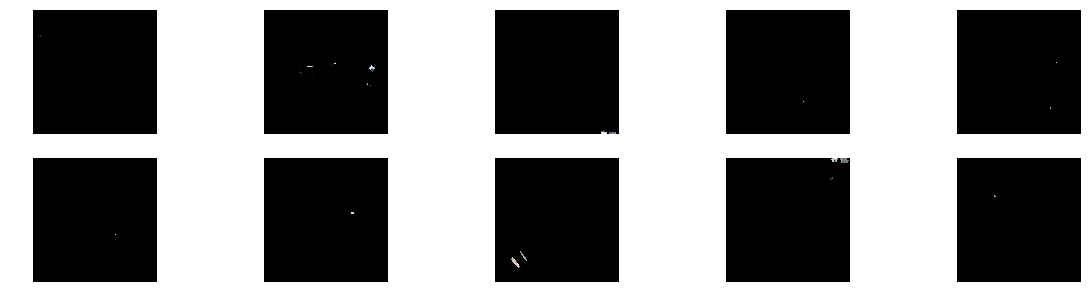

In [14]:
examples_dir = './nuristan_buildings/examples/Buildings/'

plt.figure(figsize=(20,5))

i = 0
for x in os.listdir(examples_dir):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    img = mpimg.imread(examples_dir + x)
    plt.imshow(img)
    i +=1 
    
plt.show()

In [15]:

from os import makedirs, path as op
from PIL import Image
import numpy as np
import os
import scipy.misc
labels = np.load('/Users/mmorrissey/repos/sandbox/nuristan_buildings/labels.npz') # The arrays in labels.npz are already 2D, just need to convert the numpy arrays to png 

for label in labels.files:
    new_label_dir = op.join(os.getcwd(), "new_labels_nuristan")
    if not op.isdir(new_label_dir):
        makedirs(new_label_dir)
    img = labels[label] * 255 # img is uint8 so we need to have the road pixels encoded with 255 instead of 1
    scipy.misc.imsave('{}/{}.png'.format(new_label_dir, label), img)
    print('Writing {}'.format(label))

Writing 45637-26101-16
Writing 45637-26092-16
Writing 45637-26091-16
Writing 45637-26117-16
Writing 45637-26121-16
Writing 45638-26100-16
Writing 45638-26092-16
Writing 45638-26101-16
Writing 45638-26102-16
Writing 45638-26106-16
Writing 45638-26114-16
Writing 45638-26117-16
Writing 45639-26091-16
Writing 45639-26093-16
Writing 45639-26092-16
Writing 45639-26096-16
Writing 45639-26100-16
Writing 45639-26101-16
Writing 45640-26093-16
Writing 45640-26096-16
Writing 45641-26093-16
Writing 45641-26100-16
Writing 45641-26107-16
Writing 45641-26113-16
Writing 45642-26101-16
Writing 45642-26113-16
Writing 45646-26113-16
Writing 45647-26109-16
Writing 45647-26113-16
Writing 45647-26111-16
Writing 45647-26112-16
Writing 45648-26111-16
Writing 45648-26112-16
Writing 45648-26124-16
Writing 45649-26108-16
Writing 45649-26109-16
Writing 45649-26111-16
Writing 45650-26109-16
Writing 45650-26119-16
Writing 45651-26099-16
Writing 45651-26110-16
Writing 45652-26110-16
Writing 45654-26110-16
Writing 456

Writing 45645-26118-16
Writing 45645-26119-16
Writing 45645-26120-16
Writing 45645-26121-16
Writing 45645-26122-16
Writing 45645-26123-16
Writing 45645-26124-16
Writing 45645-26125-16
Writing 45645-26126-16
Writing 45646-26091-16
Writing 45646-26092-16
Writing 45646-26093-16
Writing 45646-26094-16
Writing 45646-26095-16
Writing 45646-26096-16
Writing 45646-26097-16
Writing 45646-26098-16
Writing 45646-26099-16
Writing 45646-26100-16
Writing 45646-26101-16
Writing 45646-26102-16
Writing 45646-26103-16
Writing 45646-26104-16
Writing 45646-26105-16
Writing 45646-26106-16
Writing 45646-26107-16
Writing 45646-26108-16
Writing 45646-26109-16
Writing 45646-26110-16
Writing 45646-26111-16
Writing 45646-26112-16
Writing 45646-26114-16
Writing 45646-26115-16
Writing 45646-26116-16
Writing 45646-26117-16
Writing 45646-26118-16
Writing 45646-26119-16
Writing 45646-26120-16
Writing 45646-26121-16
Writing 45646-26122-16
Writing 45646-26123-16
Writing 45646-26124-16
Writing 45646-26125-16
Writing 456

Writing 45657-26104-16
Writing 45657-26105-16
Writing 45657-26106-16
Writing 45657-26107-16
Writing 45657-26108-16
Writing 45657-26110-16
Writing 45657-26111-16
Writing 45657-26112-16
Writing 45657-26113-16
Writing 45657-26114-16
Writing 45657-26115-16
Writing 45657-26116-16
Writing 45657-26117-16
Writing 45657-26118-16
Writing 45657-26119-16
Writing 45657-26120-16
Writing 45657-26123-16
Writing 45657-26124-16
Writing 45658-26091-16
Writing 45658-26092-16
Writing 45658-26093-16
Writing 45658-26094-16
Writing 45658-26095-16
Writing 45658-26096-16
Writing 45658-26097-16
Writing 45658-26098-16
Writing 45658-26100-16
Writing 45658-26101-16
Writing 45658-26102-16
Writing 45658-26103-16
Writing 45658-26104-16
Writing 45658-26105-16
Writing 45658-26106-16
Writing 45658-26107-16
Writing 45658-26108-16
Writing 45658-26109-16
Writing 45658-26110-16
Writing 45658-26111-16
Writing 45658-26112-16
Writing 45658-26113-16
Writing 45658-26115-16
Writing 45658-26116-16
Writing 45658-26119-16
Writing 456

In [16]:
tiles = './nuristan_buildings/tiles'

In [17]:
!pixel_decoder train --batch_size=4 \
                    --imgs_folder=tiles \
                    --masks_folder=new_labels \
                    --models_folder=nuristain_trained_models_out \
                    --model_id=resnet_unet \
                    --origin_shape_no=256 \
                    --border_no=32

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2019-08-26 22:57:00.100970: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
steps_per_epoch 51 validation_steps 17
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (

Epoch 1/10
 - 254s - loss: 0.6509 - dice_coef: 0.3147 - dice_coef_rounded: 0.3592 - binary_crossentropy: 0.4564 - val_loss: 0.9265 - val_dice_coef: 0.0230 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.6401
Epoch 2/10
 - 249s - loss: 0.5655 - dice_coef: 0.4043 - dice_coef_rounded: 0.4317 - binary_crossentropy: 0.3940 - val_loss: 0.9510 - val_dice_coef: 0.0111 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.7361
Epoch 3/10
 - 251s - loss: 0.5103 - dice_coef: 0.4628 - dice_coef_rounded: 0.4875 - binary_crossentropy: 0.3577 - val_loss: 0.9661 - val_dice_coef: 0.0051 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.8025
Epoch 4/10
 - 250s - loss: 0.5480 - dice_coef: 0.4254 - dice_coef_rounded: 0.4466 - binary_crossentropy: 0.3972 - val_loss: 0.9694 - val_dice_coef: 0.0044 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.8210
Epoch 5/10
 - 255s - loss: 0.4902 - dice_coef: 0.4875 - dice_coef_rounded: 0.5102 - binary_crossentropy: 0.3640 - va

Epoch 9/10
 - 268s - loss: 0.3177 - dice_coef: 0.5642 - dice_coef_rounded: 0.6104 - binary_crossentropy: 0.1997 - val_loss: 0.3864 - val_dice_coef: 0.5124 - val_dice_coef_rounded: 0.5526 - val_binary_crossentropy: 0.2852
Epoch 10/10
 - 268s - loss: 0.3259 - dice_coef: 0.5662 - dice_coef_rounded: 0.6143 - binary_crossentropy: 0.2181 - val_loss: 0.3774 - val_dice_coef: 0.5305 - val_dice_coef_rounded: 0.5672 - val_binary_crossentropy: 0.2853
Epoch 1/10
 - 271s - loss: 0.3280 - dice_coef: 0.5458 - dice_coef_rounded: 0.5925 - binary_crossentropy: 0.2018 - val_loss: 0.3867 - val_dice_coef: 0.4962 - val_dice_coef_rounded: 0.5431 - val_binary_crossentropy: 0.2696
Epoch 2/10
 - 270s - loss: 0.3193 - dice_coef: 0.5614 - dice_coef_rounded: 0.6103 - binary_crossentropy: 0.2000 - val_loss: 0.3819 - val_dice_coef: 0.5177 - val_dice_coef_rounded: 0.5598 - val_binary_crossentropy: 0.2815
Epoch 3/10
 - 267s - loss: 0.3128 - dice_coef: 0.5671 - dice_coef_rounded: 0.6120 - binary_crossentropy: 0.1926 - v

 - 268s - loss: 0.2339 - dice_coef: 0.5588 - dice_coef_rounded: 0.6247 - binary_crossentropy: 0.1648 - val_loss: 0.3089 - val_dice_coef: 0.5087 - val_dice_coef_rounded: 0.5702 - val_binary_crossentropy: 0.2481
Epoch 27/50
 - 267s - loss: 0.2232 - dice_coef: 0.5896 - dice_coef_rounded: 0.6597 - binary_crossentropy: 0.1609 - val_loss: 0.3105 - val_dice_coef: 0.5222 - val_dice_coef_rounded: 0.5815 - val_binary_crossentropy: 0.2547
Epoch 28/50
 - 267s - loss: 0.2324 - dice_coef: 0.5653 - dice_coef_rounded: 0.6316 - binary_crossentropy: 0.1650 - val_loss: 0.3157 - val_dice_coef: 0.5100 - val_dice_coef_rounded: 0.5674 - val_binary_crossentropy: 0.2576
Epoch 29/50
 - 268s - loss: 0.2335 - dice_coef: 0.5630 - dice_coef_rounded: 0.6395 - binary_crossentropy: 0.1656 - val_loss: 0.3217 - val_dice_coef: 0.4837 - val_dice_coef_rounded: 0.5360 - val_binary_crossentropy: 0.2568
Epoch 30/50
 - 268s - loss: 0.2283 - dice_coef: 0.5743 - dice_coef_rounded: 0.6486 - binary_crossentropy: 0.1625 - val_loss:

 - 268s - loss: 0.3449 - dice_coef: 0.6317 - dice_coef_rounded: 0.6567 - binary_crossentropy: 0.2124 - val_loss: 0.4162 - val_dice_coef: 0.5654 - val_dice_coef_rounded: 0.5877 - val_binary_crossentropy: 0.3119
Epoch 14/50
 - 267s - loss: 0.3651 - dice_coef: 0.6072 - dice_coef_rounded: 0.6314 - binary_crossentropy: 0.2081 - val_loss: 0.4233 - val_dice_coef: 0.5581 - val_dice_coef_rounded: 0.5813 - val_binary_crossentropy: 0.3183
Epoch 15/50
 - 267s - loss: 0.3557 - dice_coef: 0.6170 - dice_coef_rounded: 0.6411 - binary_crossentropy: 0.2006 - val_loss: 0.4273 - val_dice_coef: 0.5539 - val_dice_coef_rounded: 0.5763 - val_binary_crossentropy: 0.3204
Epoch 16/50
 - 267s - loss: 0.3280 - dice_coef: 0.6464 - dice_coef_rounded: 0.6712 - binary_crossentropy: 0.1830 - val_loss: 0.4176 - val_dice_coef: 0.5657 - val_dice_coef_rounded: 0.5863 - val_binary_crossentropy: 0.3234
Epoch 17/50
^C
Traceback (most recent call last):
  File "/anaconda3/envs/lm_36/bin/pixel_decoder", line 11, in <module>
   

## Predict

In [31]:

new_label_dir = op.join(os.getcwd(), "nuristan_test_tiles/")
if not op.isdir(new_label_dir):
    makedirs(new_label_dir)

from os import path, listdir, mkdir
for f in listdir(path.join("./nuristan_buildings/tiles/")):
    #print(f)
    img = "./nuristan_buildings/tiles/" + f
    im = Image.open(img)
    im.save(('nuristan_test_tiles/' + f).replace(".jpg",".tif"))

In [21]:
!pixel_decoder predict --imgs_folder=tiles \
                       --test_folder=nuristan_test_tiles \
                      --models_folder=nuristan_trained_models_out \
                      --pred_folder=predictions \
                      --model_id=resnet_unet \
                      --origin_shape_no=256

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2019-08-27 13:59:36.285145: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
100%|███████████████████████████████████████████| 71/71 [01:43<00:00,  1.46s/it]


In [22]:


def grey2rgb(img):
    """
    Create model prediction result to 3 channel
    """
    new_img = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img.append([img[i][j]]*3)
    new_img = np.array(new_img).reshape(img.shape[0], img.shape[1], 3)
    return new_img

In [23]:
preds = listdir(path.join("/Users/mmorrissey/repos/sandbox/predictions/nuristan_resnet_unet/"))

In [25]:
pred_list = [op.basename(f).split(".")[0] for f in preds]

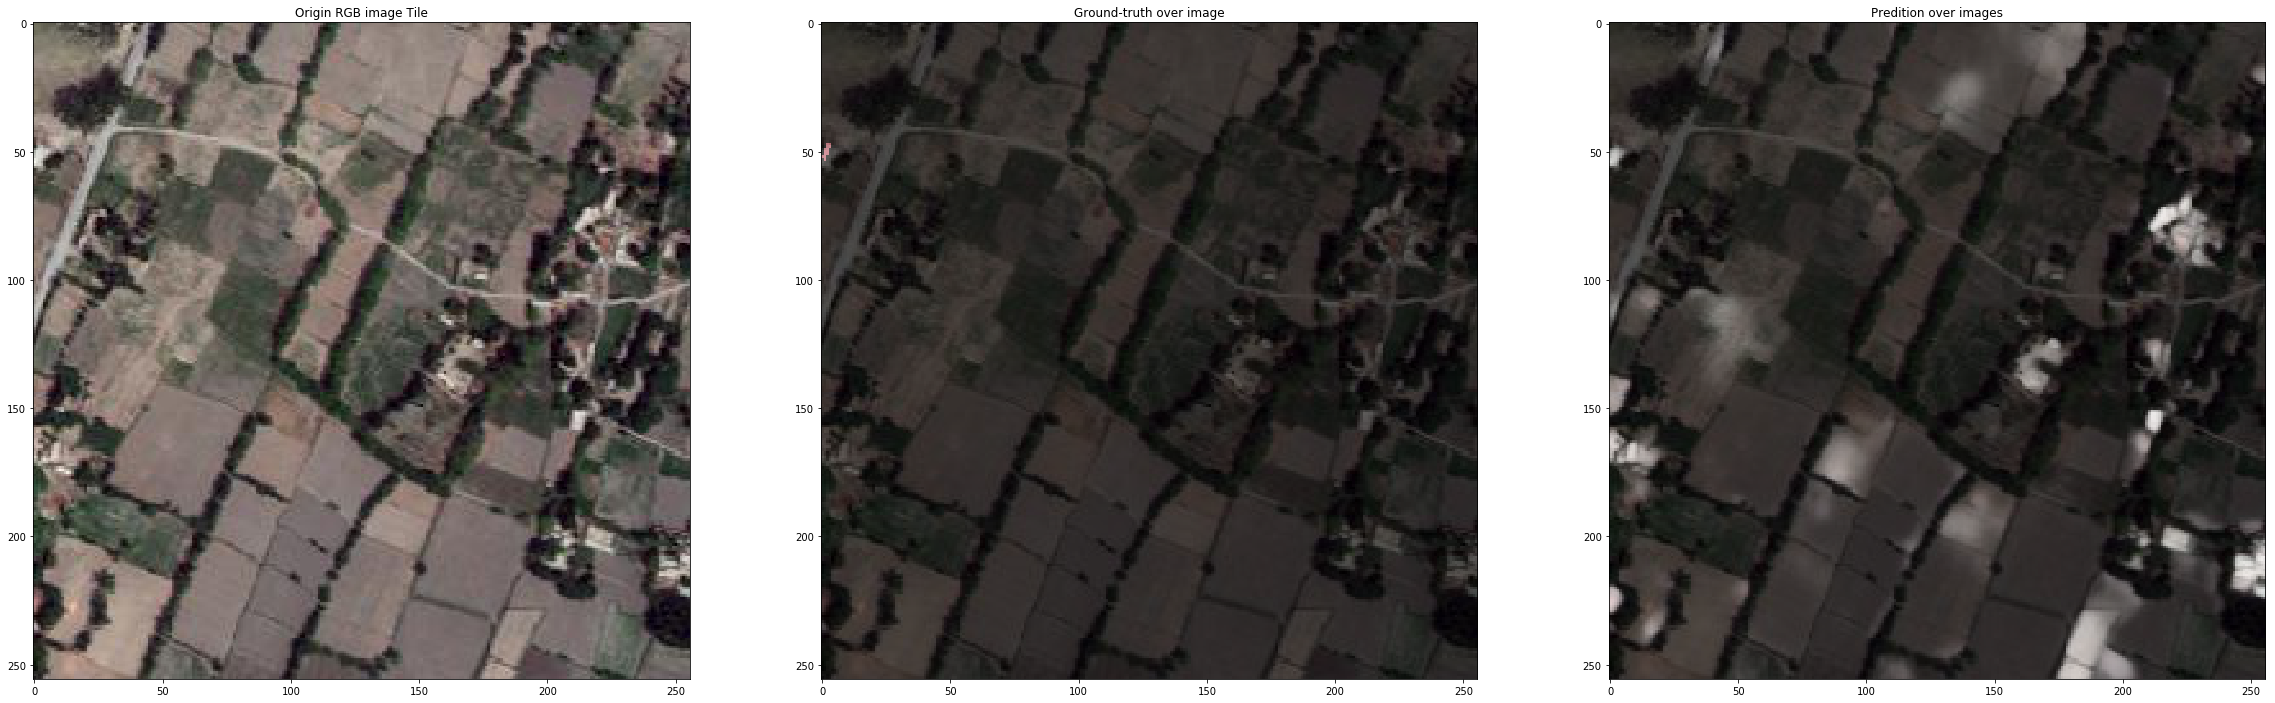

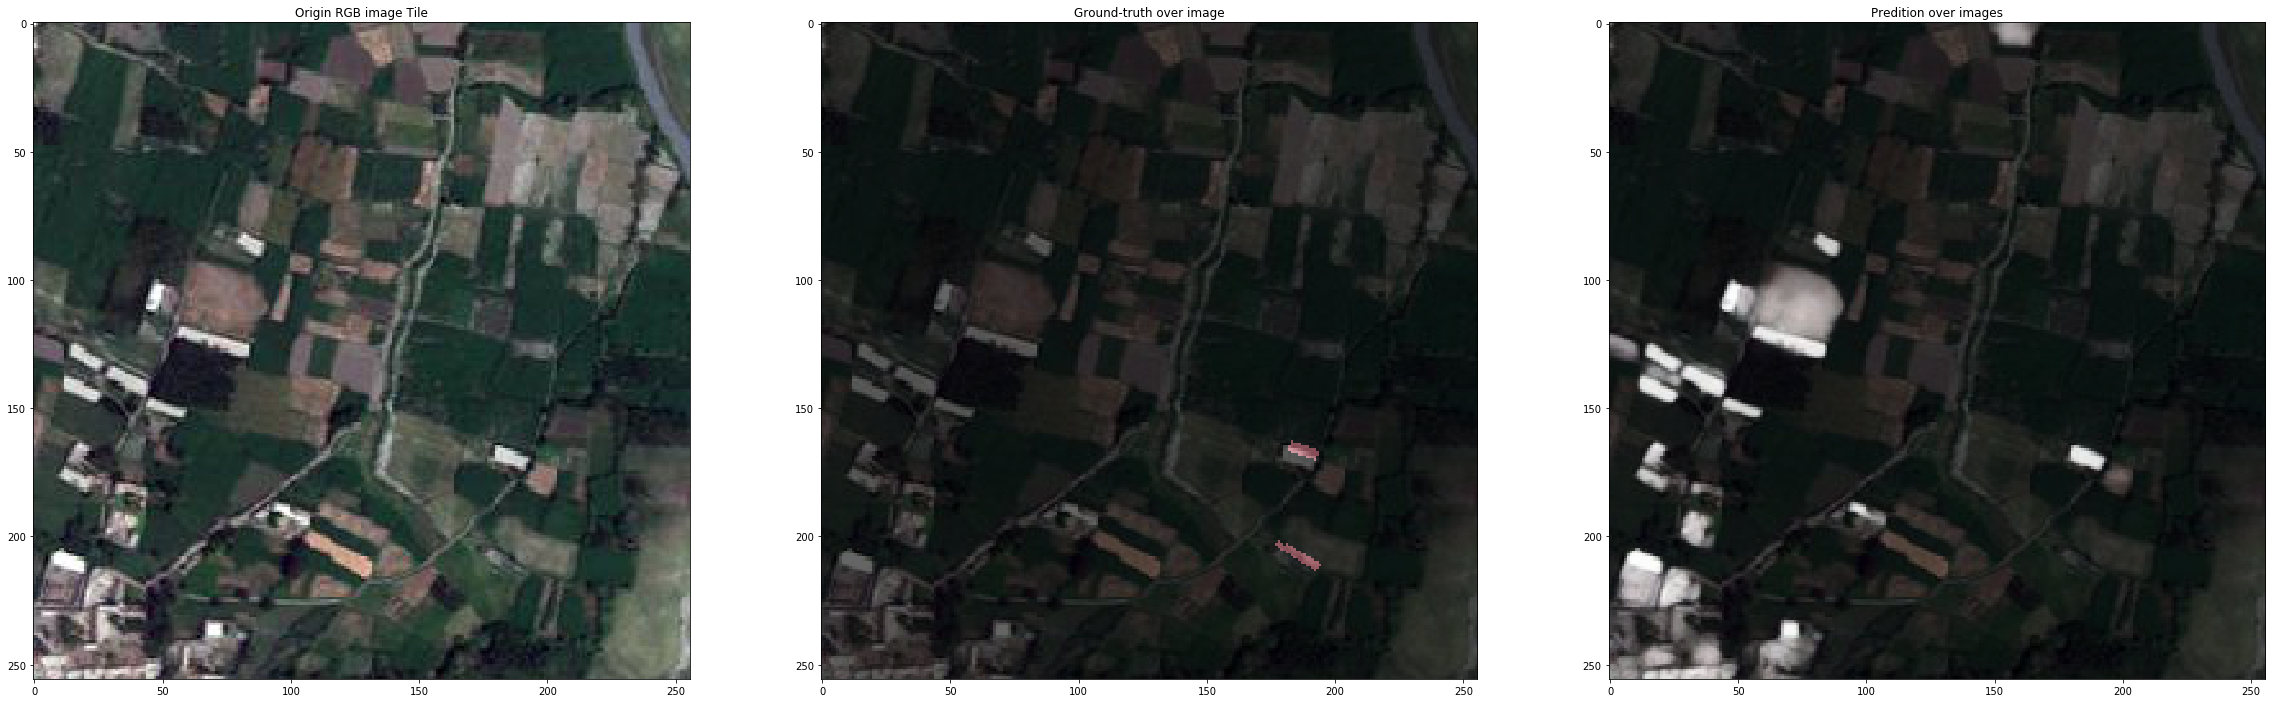

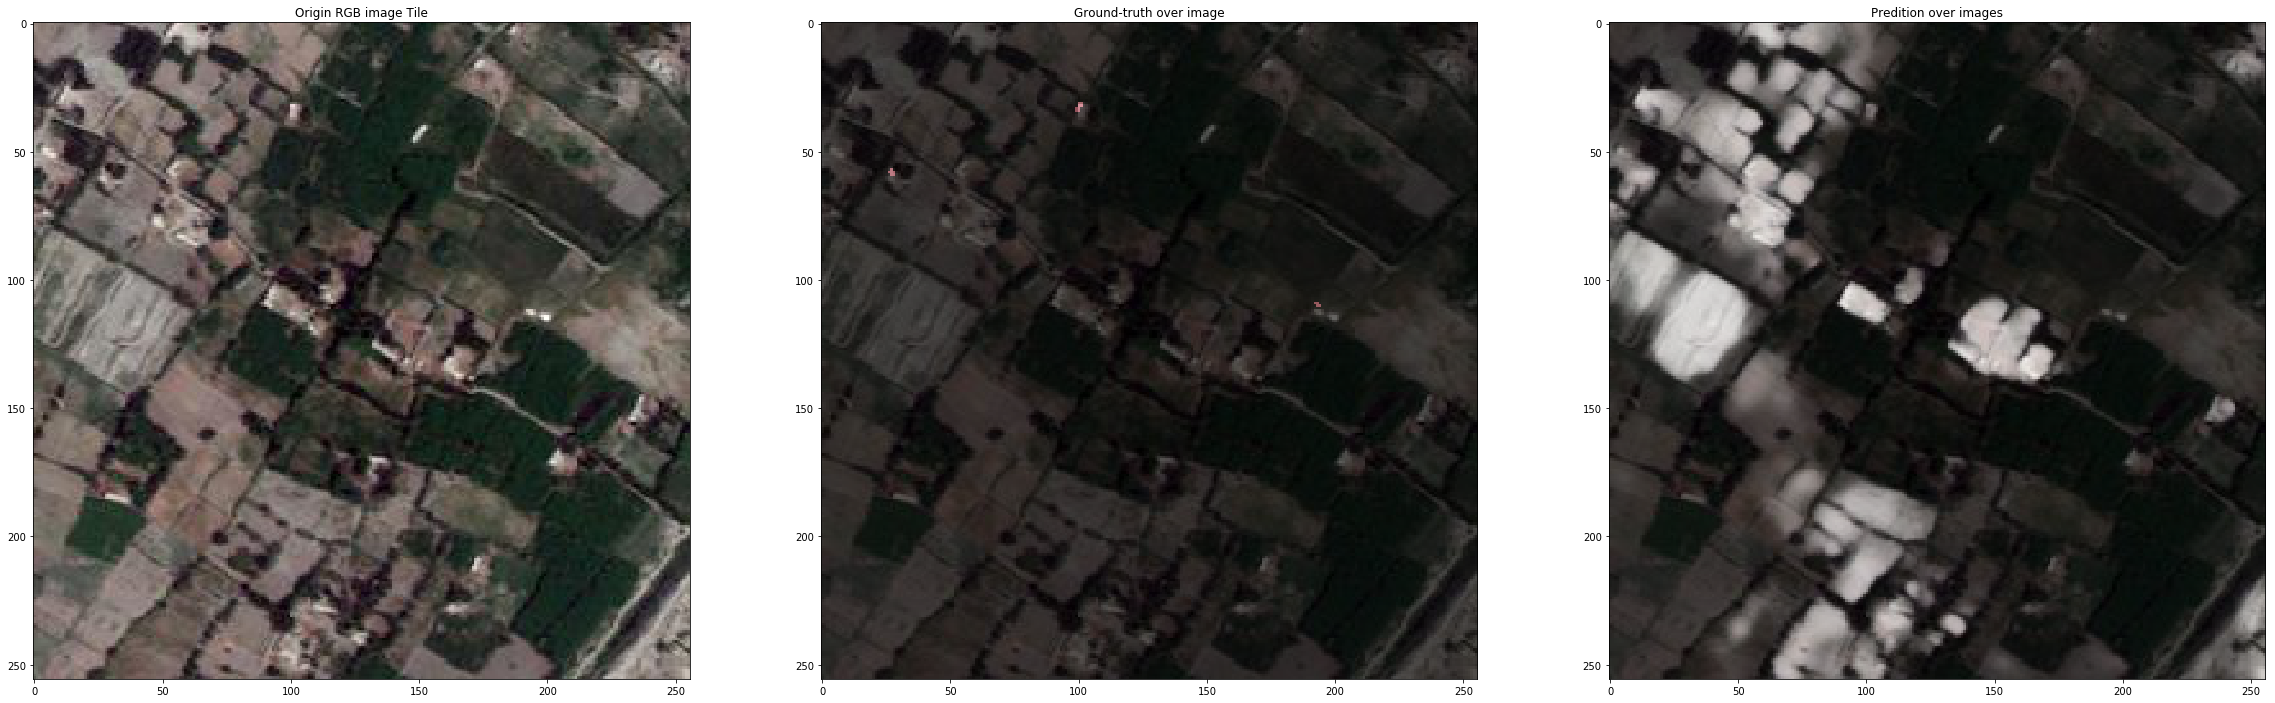

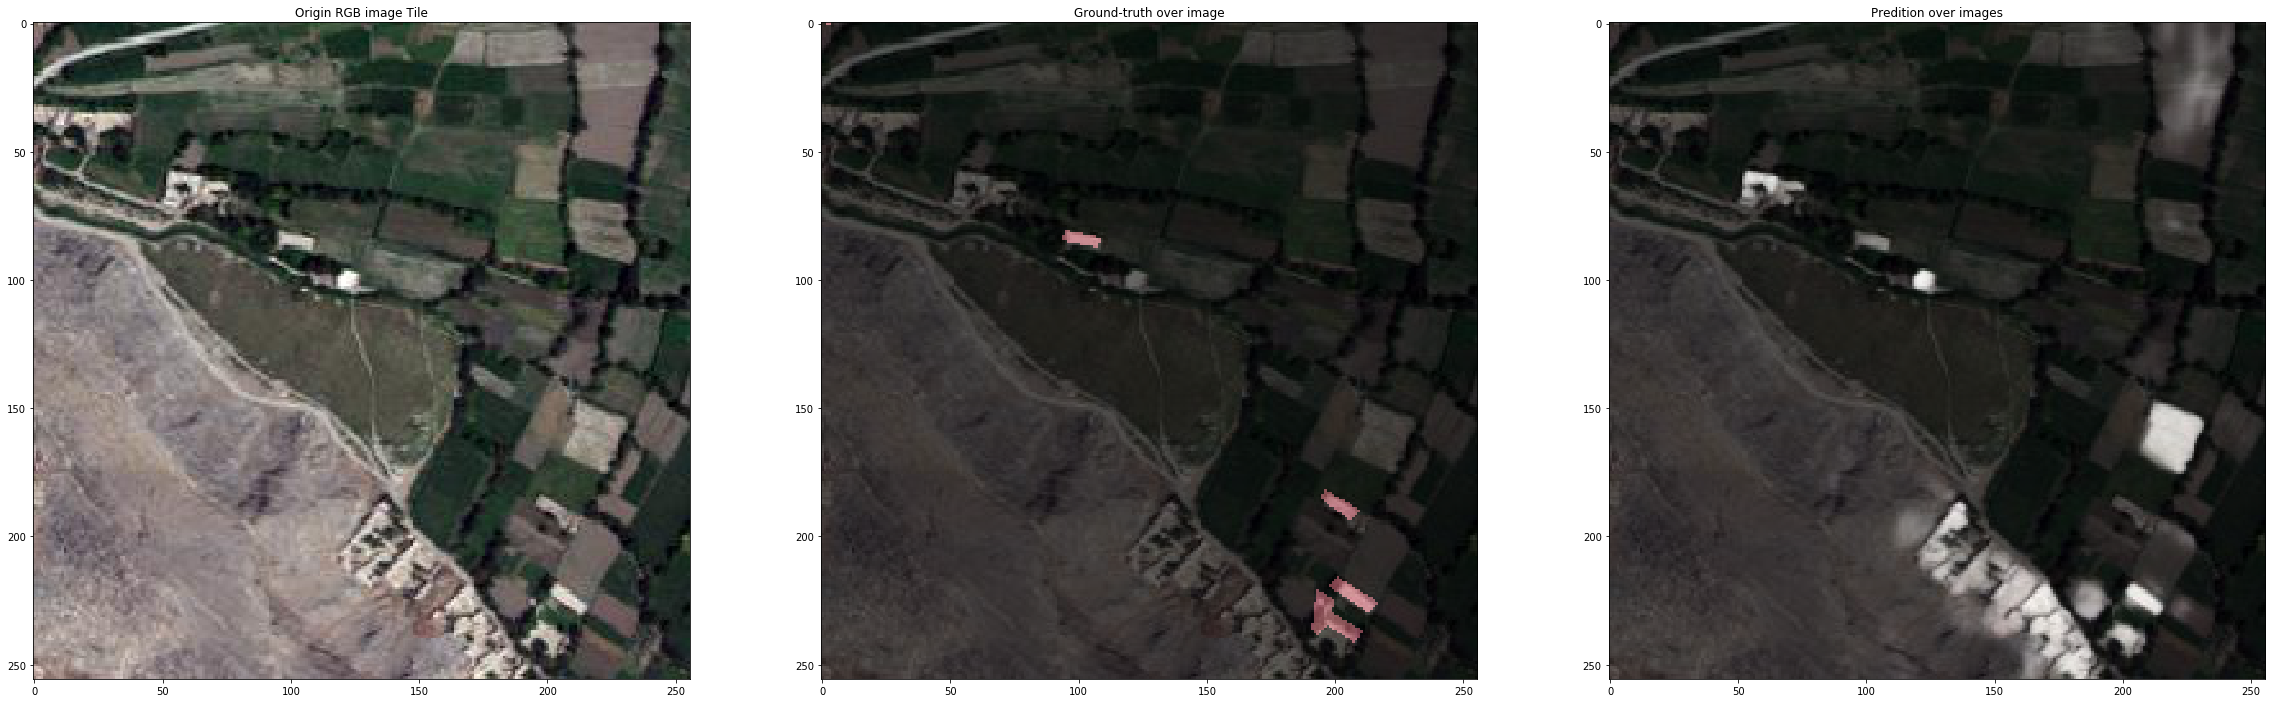

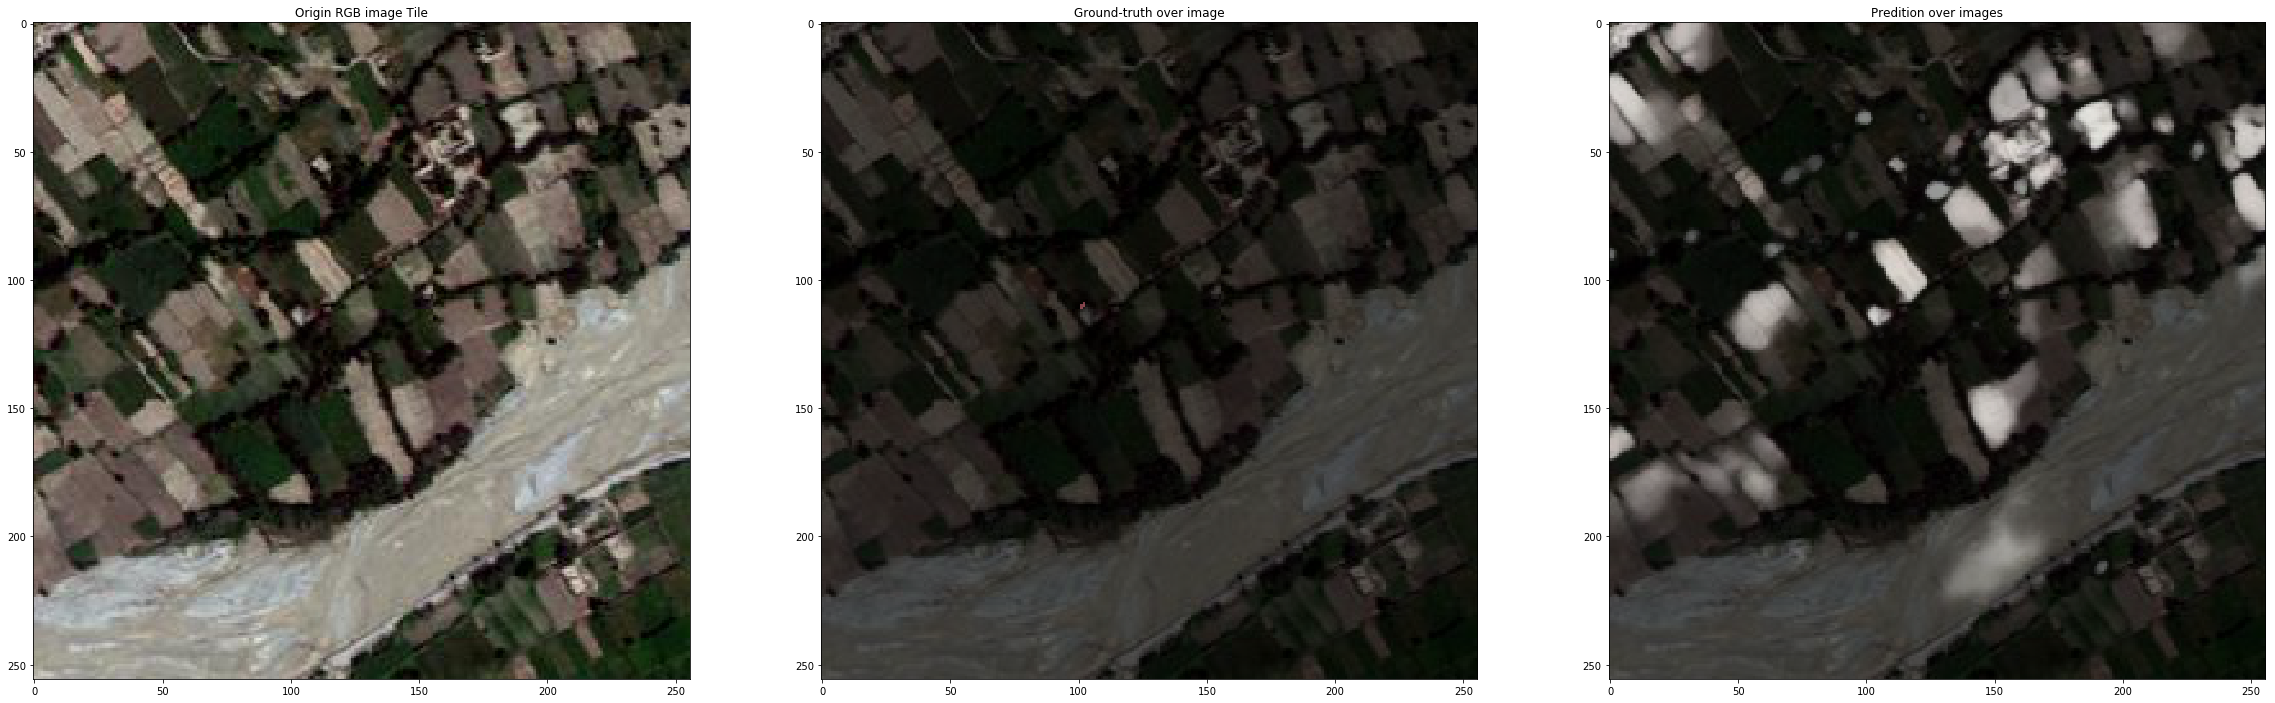

In [30]:
#model training stopped early,

new_label_dir = op.join(os.getcwd(), "nuristan_result_figures")
if not op.isdir(new_label_dir):
    makedirs(new_label_dir)

for pred in pred_list[0:5]:
    img = mpimg.imread("nuristan_buildings/tiles/{}.jpg".format(pred))
    mask = mpimg.imread("nuristan_buildings/labels/{}.png".format(pred))
    pred_mask = grey2rgb(mpimg.imread("predictions/nuristan_resnet_unet/{}.png".format(pred)))
    masked = np.ma.masked_where(pred_mask >=1, pred_mask) 

    fig, ax =  plt.subplots(1, 3, figsize=(40, 20))
    ax[-3].imshow(img, 'gray', interpolation='none')
    ax[-3].set_title('Origin RGB image Tile')

    ax[-2].imshow(img, 'gray', interpolation='none')
    ax[-2].imshow(mask, 'jet', interpolation='none', alpha=0.6)
    ax[-2].set_title('Ground-truth over image')

    ax[-1].imshow(img, 'gray', interpolation='none')
    ax[-1].imshow(masked, 'jet', interpolation='none', alpha=0.6)
    ax[-1].set_title('Predition over images')

    fig.savefig("nuristan_result_figures/buildings_pred_{}.png".format(pred))

## Convet Output Masks to Vectors